In [65]:
import matplotlib
import pandas
import psutil

%matplotlib inline


https://psutil.readthedocs.io/en/latest/

Possible process attributes:
    
    `
    'cmdline', 'connections', 'cpu_affinity', 'cpu_num', 'cpu_percent', 'cpu_times', 'create_time', 'cwd', 'environ', 'exe', 'gids', 'io_counters', 'ionice', 'memory_full_info', 'memory_info', 'memory_maps', 'memory_percent', 'name', 'nice', 'num_ctx_switches', 'num_fds', 'num_handles', 'num_threads', 'open_files', 'pid', 'ppid', 'status', 'terminal', 'threads', 'uids', 'username'.
    `

In [19]:
columns = ['pid', 'name', 'ppid', 'cmdline', 'cwd']

In [20]:
i = 0
for proc in psutil.process_iter(attrs=columns):
    print(proc.info)
    i += 1
    if i > 5:
        break

{'pid': 0, 'name': 'kernel_task', 'ppid': 0, 'cmdline': [], 'cwd': None}
{'pid': 1, 'name': 'launchd', 'ppid': 0, 'cmdline': None, 'cwd': None}
{'pid': 57, 'name': 'syslogd', 'ppid': 1, 'cmdline': None, 'cwd': None}
{'pid': 58, 'name': 'UserEventAgent', 'ppid': 1, 'cmdline': None, 'cwd': None}
{'pid': 61, 'name': 'uninstalld', 'ppid': 1, 'cmdline': None, 'cwd': None}
{'pid': 62, 'name': 'kextd', 'ppid': 1, 'cmdline': None, 'cwd': None}


In [46]:
i = 0
vvalues = []
for proc in psutil.process_iter(attrs=columns):
    values = list(proc.info.values())
    vvalues += [values]

#     if i > 5:
#         break
#     i +=1     
    
df = df.append(vvalues, ignore_index=True)


In [47]:
df = pandas.DataFrame(columns=columns, data=vvalues)

In [50]:
df.head(n=15)

,pid,name,ppid,cmdline,cwd
0,0,kernel_task,0,[],None
1,1,launchd,0,None,None
2,57,syslogd,1,None,None
3,58,UserEventAgent,1,None,None
4,61,uninstalld,1,None,None
5,62,kextd,1,None,None
6,63,fseventsd,1,None,None
7,68,appleeventsd,1,None,None
8,69,systemstats,1,None,None
9,71,configd,1,None,None


In [52]:
len(set(df.ppid))

16

In [53]:
len(set(df.pid))

270

In [58]:
df.iloc[14]['name']

'Little Snitch Da'

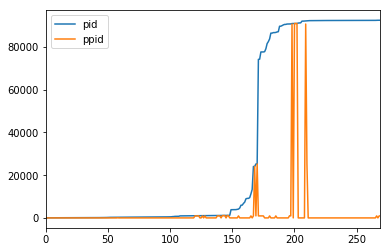

In [64]:
df.plot()

Questions:

* How many processes are launched by only one unique parent process?
* How many child processes are typically launched by a parent process?
* Write a simple method to alert the first time a process is launched by a never-before-seen parent process name